In [16]:
from selenium import webdriver
import pickle
import time

In [17]:
main_url = "http://naver.com"
mail_url = "http://mail.naver.com"

In [18]:
# 브라우져 오픈 및 메인 사이트 이동
driver =  webdriver.Chrome()
driver.get(main_url)

In [20]:
# 로그인 버튼 클릭
driver.find_element_by_css_selector(".lg_global_btn").click()

In [21]:
# 아이디 패스워드 입력
pw = pickle.load(open("./pw.plk", "rb"))
driver.find_element_by_css_selector( "#id" ).send_keys( "1221pdj" )
driver.find_element_by_css_selector( "#pw" ).send_keys( pw )

In [22]:
# 로그인 버튼 클릭
driver.find_element_by_css_selector(".btn_global").click()

In [23]:
# 메일 페이지로 이동
driver.get(mail_url)

In [24]:
# 전체 메일 체크
driver.find_element_by_css_selector("#mailCheckAll").click()

In [25]:
# 삭제 버튼 입력
driver.find_element_by_css_selector(".do_delete").click();

In [26]:
# 전체 메일 갯수
total_mail = driver.find_element_by_css_selector("#headUnreadNum").text
total_mail = int(total_mail)
total_mail

1682

In [27]:
# 전체 페이지
tital_page = total_mail // 45 + 1
tital_page

38

In [28]:
# 메일 제목, 보낸사람 이름 가져오기
titles = driver.find_elements_by_css_selector(".mail_title")
names = driver.find_elements_by_css_selector(".name")
for idx, title in enumerate(titles):
    print(idx+1, names[idx].text, titles[idx].text)

1 산업경제리서치 [보고서] "국내외 2차전지 산업 현황과 비즈니스 전략"
2 윈글리쉬 [W’s TUESDAY] 이런 말은 영어로 어떻게 표현해요? _ 바로 써먹는 영어
3 Twitter 새누리 조원진 “노무현, 유병언과 식사”…아니면 말고?
4 윈글리쉬 [W’s MONDAY] 꾸준히 보며 익히면 점수가 된다!! _ 시험에 나오는 영어
5 Twitter NOTICE
6 Facebook 박야일, 김준, 우경다예님을 아세요?
7 북앤라이프 [북앤라이프]티머니 이벤트 안내 메일입니다.
8 Twitter 곡 정보
9 Twitter 애플의 아이폰 6 주문 생산량, 사상 최대 규모
10 한국과총 [한국과총 Webzine] “2014대한민국과학기술연차대회, 다시 과학기술이다!”
11 향수홀릭 망설이면 품절! 테스터 향수 앵콜전
12 Facebook 박민우, 김영희, 문승희님을 아세요?
13 LG전자 세계1위! LG 21:9 모니터 구매하고 푸짐한 사은품 받아가세요!
14 Twitter 앨범 정보
15 과학기술정책연구원 [STEPI]「과학기술+사회혁신」포럼 - 제3차 사회·기술시스템 전환, 어떻게 할 것인가? (7/16,수,15시)
16 Twitter 너희가 뭔데 건드려?…MBC, 세월호 유족 문전박대
17 한국과총 [과총] 국민안전사회를 위한 과학기술계 대토론회 개최
18 윈글리쉬 [W’s THURSDAY] 난 해외출장도 문제 없는 멋진 글로벌 인재!! _ 잘난척씨의 비즈영어
19 한국과총 과총 글로벌 브리프(제137호)
20 Facebook 박주선, Eunhye Park, 박진우님을 아세요?
21 Twitter 김상민 의원, ‘셧다운제’ 폐지 법안 발의
22 윈글리쉬 [W’s WEDNESDAY] 쉽고 재미있게 배워 오래 기억하자!! _ 놀면서 배우는 영어
23 한국과총 [국회 대토론회] 국가 행복지수 향상을 위한 재난ㆍ재해에 관한 과학기술의 역할
24 한국과총 [과총] 국민안전사회를 위한 과학기술계 대토론회 개최
25 윈글리쉬 [W’s TUESDAY] 이런 말은 영어로 

In [29]:
# 여러 페이지 메일 삭제
for _ in range(3):
    driver.find_element_by_css_selector("#mailCheckAll").click()
    driver.find_element_by_css_selector(".do_delete").click();
    time.sleep(1)

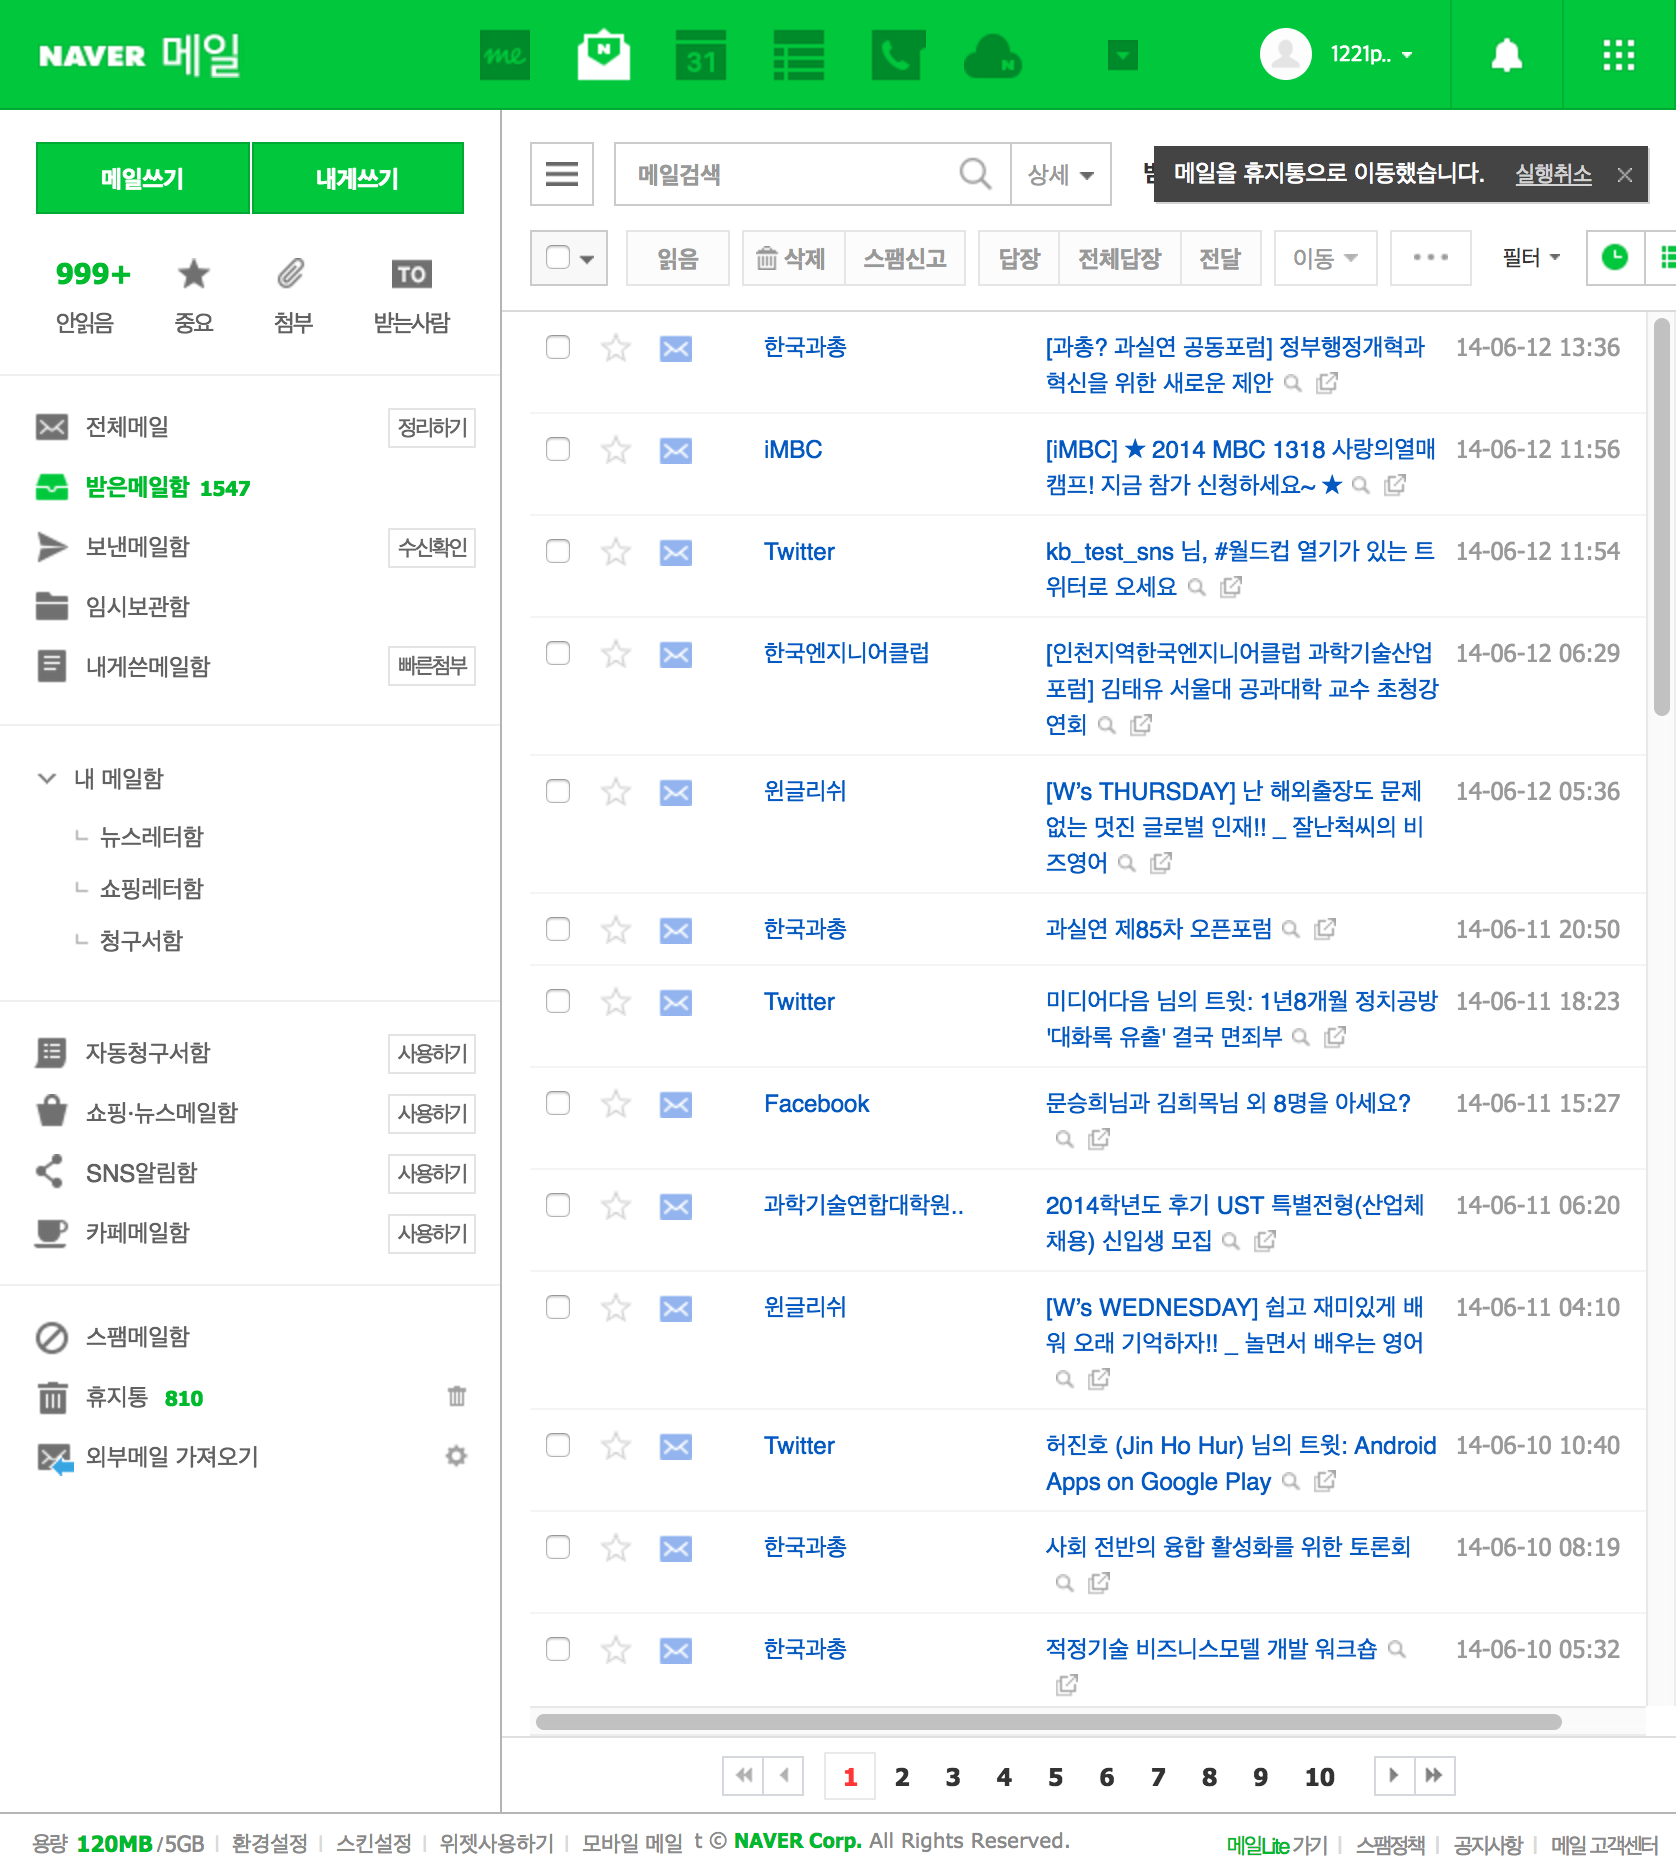

In [30]:
from IPython.display import Image
naver_img = driver.get_screenshot_as_base64()
Image(naver_img)

In [31]:
# 이미지 저장
import base64
imgdata = base64.b64decode(naver_img)
with open('naver_img.jpg', 'wb') as f:
    f.write(imgdata)

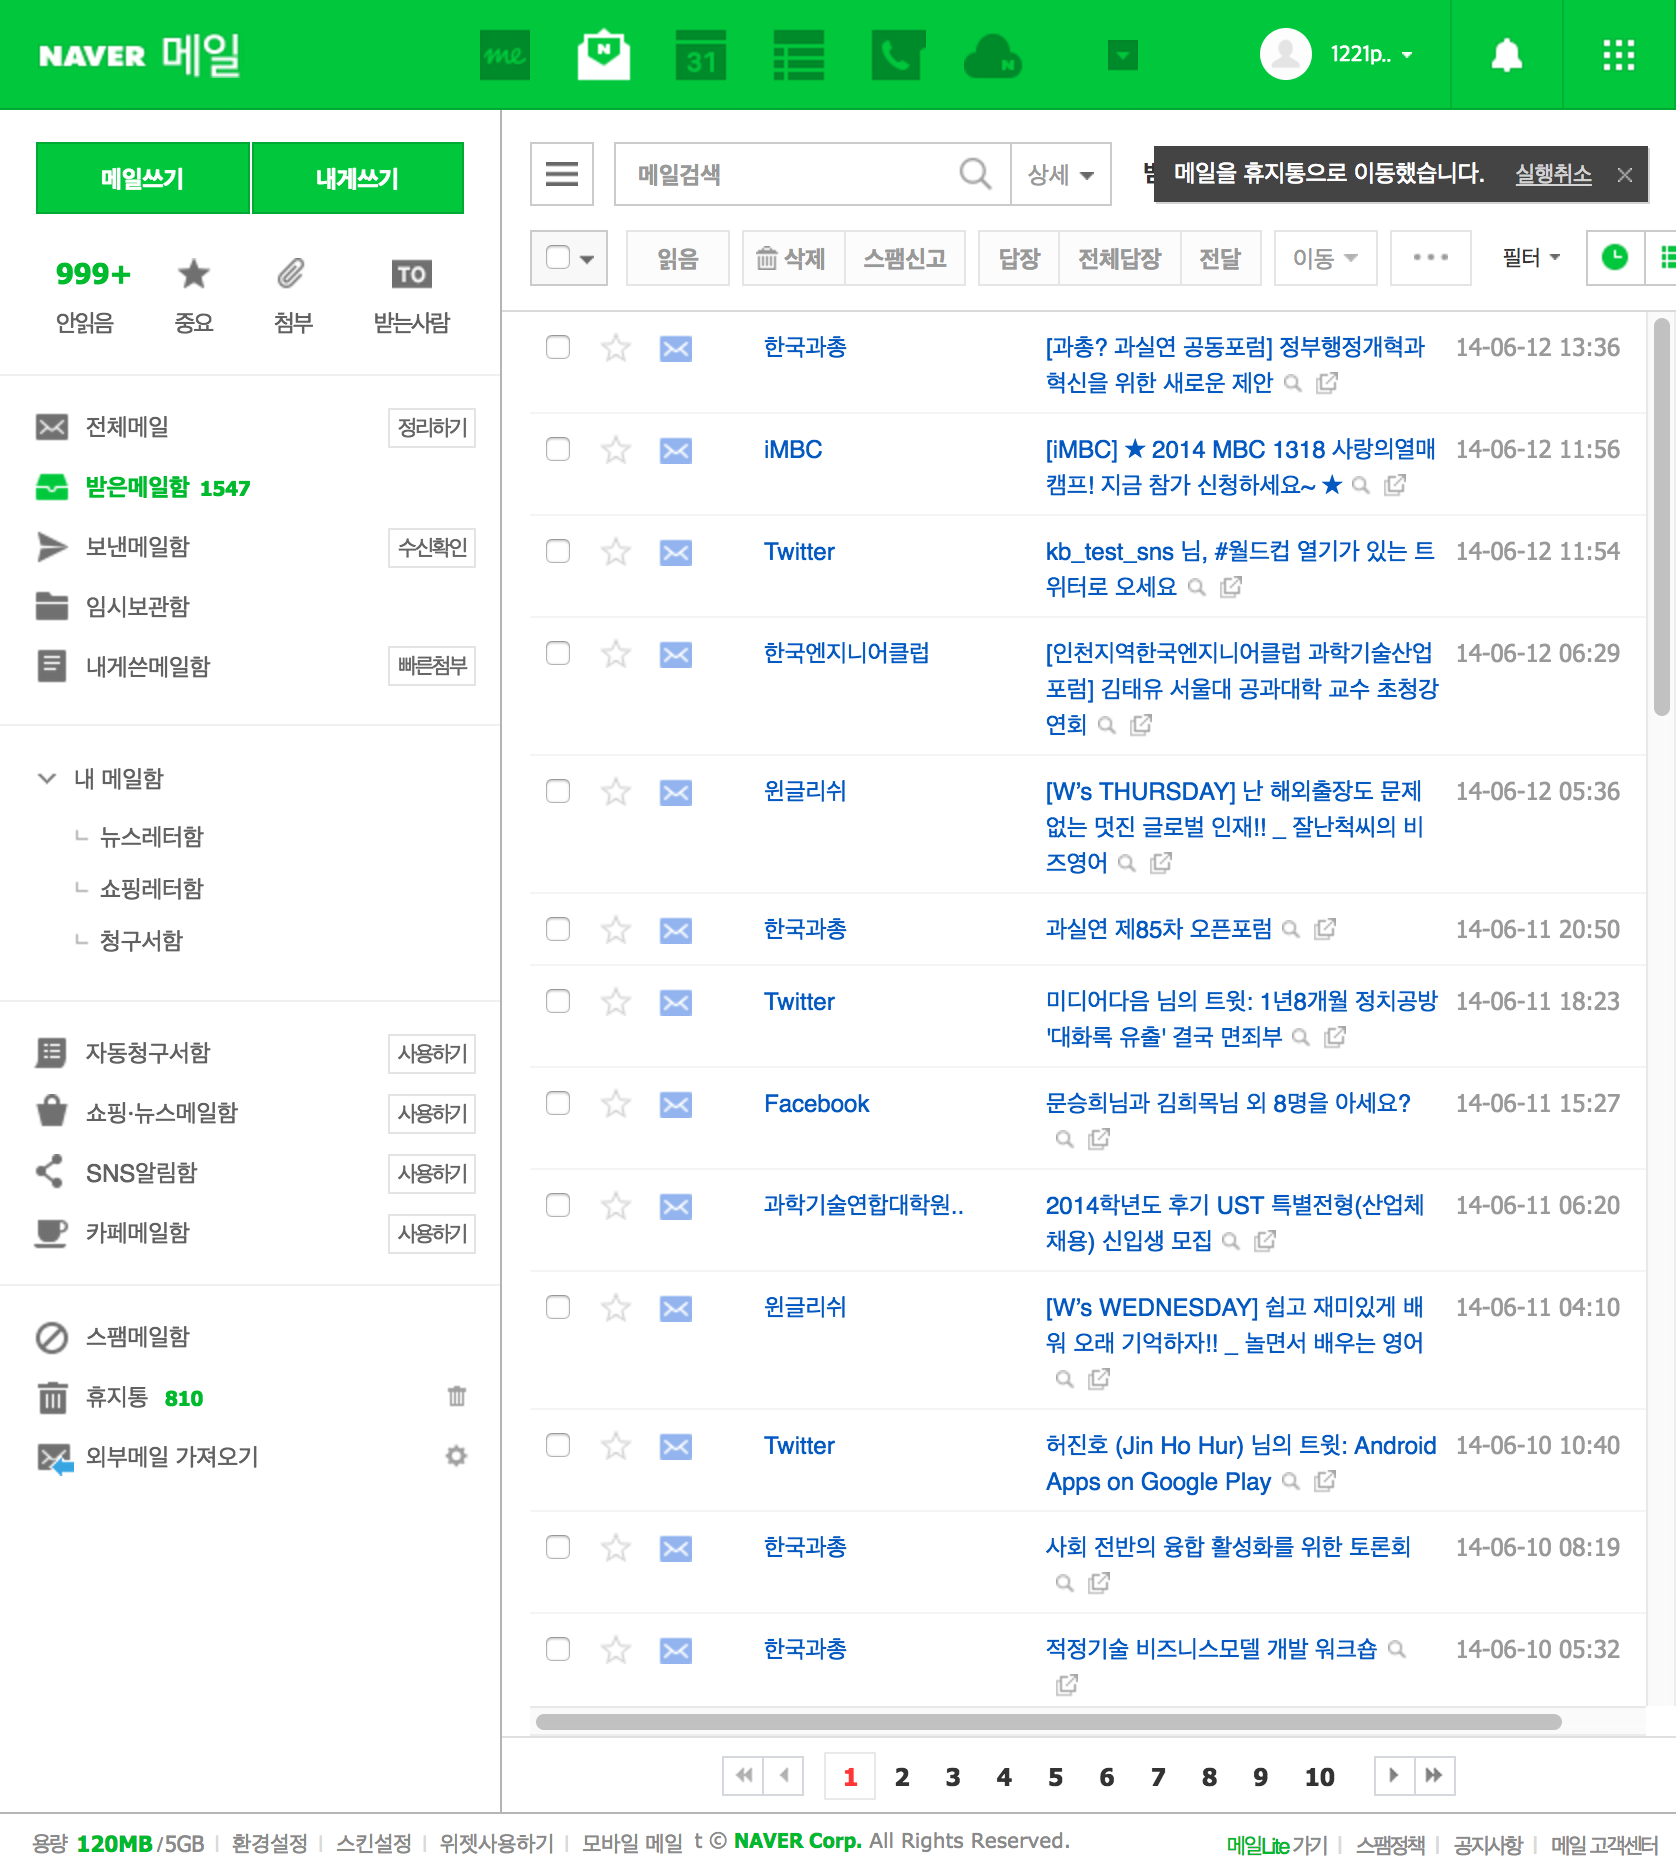

In [33]:
# 이미지 로드
with open("naver_img.jpg", "r") as fh:
    load_naver_img = fh.read()
Image(load_naver_img)

In [34]:
# 로그아웃
logout_url = driver.find_element_by_css_selector(".gnb_btn_login").get_attribute("href")
driver.get(logout_url)

In [35]:
# 브라우져 닫기
driver.close()